In [23]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

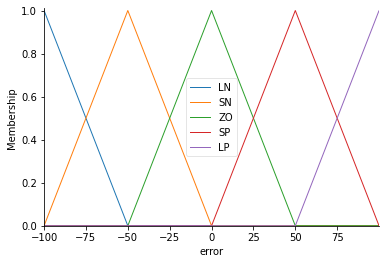

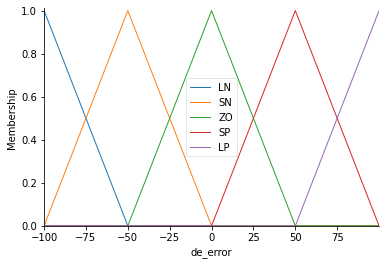

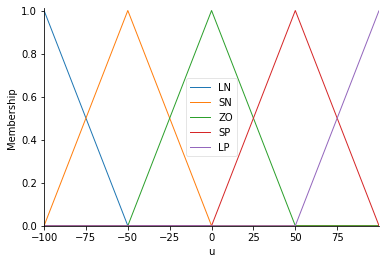

In [55]:
error = ctrl.Antecedent(np.arange(-100,100,0.1),"error")
de_error = ctrl.Antecedent(np.arange(-100,100,0.1),'de_error')
u = ctrl.Consequent(np.arange(-100,100,0.1),"u")
error["LN"] = fuzz.trimf(error.universe,[-100,-100,-50])
error["SN"] = fuzz.trimf(error.universe,[-100,-50,0])
error["ZO"] = fuzz.trimf(error.universe,[-50,0,50])
error["SP"] = fuzz.trimf(error.universe,[0,50,100])
error["LP"] = fuzz.trimf(error.universe,[50,100,100])

de_error["LN"] = fuzz.trimf(de_error.universe,[-100,-100,-50])
de_error["SN"] = fuzz.trimf(de_error.universe,[-100,-50,0])
de_error["ZO"] = fuzz.trimf(de_error.universe,[-50,0,50])
de_error["SP"] = fuzz.trimf(de_error.universe,[0,50,100])
de_error["LP"] = fuzz.trimf(de_error.universe,[50,100,100])

u["LN"] = fuzz.trimf(u.universe,[-100,-100,-50])
u["SN"] = fuzz.trimf(u.universe,[-100,-50,0])
u["ZO"] = fuzz.trimf(u.universe,[-50,0,50])
u["SP"] = fuzz.trimf(u.universe,[0,50,100])
u["LP"] = fuzz.trimf(u.universe,[50,100,100])
error.view()
de_error.view()
u.view()

In [56]:
rule1 = ctrl.Rule((error["LN"]|(de_error["LN"] or de_error["SN"])) or (error["SN"]|(de_error["LN"] or de_error["SN"])),u["LN"])
rule2 = ctrl.Rule((error["ZO"]|(de_error["LN"] or de_error["SN"])) or (de_error["ZO"]|(error["LN"] or error["SN"])),u["SN"])
rule3 = ctrl.Rule((error["LN"]|de_error["LP"]) or (error["SN"]|de_error["SP"]) or (error["ZO"]|de_error["ZO"]) or (error["SP"]|de_error["SN"]) or (error["LP"]|de_error["LN"]),u["ZO"])
rule4 = ctrl.Rule((error["LP"]|(de_error['SN'] or de_error["ZO"])) or (error["SP"]|de_error["ZO"]) or (error["ZO"]|de_error["SP"]) or (de_error["LP"]|(error['SN'] or error["ZO"])),u["SP"])
rule5 = ctrl.Rule((error["LP"]|(de_error["LP"] or de_error["SP"])) or (error["SP"]|(de_error["LP"] or de_error["SP"])),u["LP"])

-0.45121640181167927


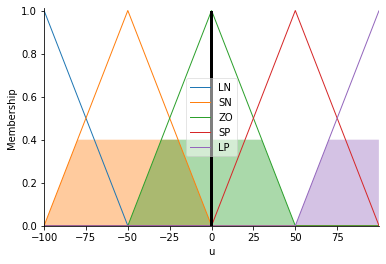

In [59]:
speed_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
speed = ctrl.ControlSystemSimulation(speed_ctrl)
speed.input["error"] = -30
speed.input["de_error"] =70
speed.compute()
print(speed.output["u"])
u.view(sim = speed)